**Materi ini dibuat oleh : [Sardi Irfansyah](https://www.linkedin.com/in/sardi-irfansyah-947bb554/)**


# A. Linear Regression

Anda mungkin sudah familiar dengan bentuk paling sederhana dari model regresi linear, yaitu memodelkan data dengan garis lurus. Namun, model seperti ini dapat diperluas untuk memodelkan perilaku data yang lebih kompleks.

Kita akan mulai dengan regresi linear yang paling dasar, yaitu memodelkan data dengan garis lurus. Model garis lurus ini memiliki bentuk sebagai berikut:

$$
y = ax + b
$$

Di mana $a$ biasanya dikenal sebagai *kemiringan* (slope), $b$ dikenal sebagai *intersep* (intercept) dan x adalah fitur atau  input yang memengaruhi nilai output (𝑦).


## A.1 - Simple Linear Regression

Untuk bagian ini, kita akan menggunakan dataset [Pizza Franchise](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). Dalam data berikut, Anda akan memiliki:

- **`X`**: biaya tahunan waralaba atau *annual franchise fee* ($1000)

- **`y`**: biaya awal pendirian atau *start up cost* ($1000)  

Tujuan kita adalah memprediksi berapa biaya yang diperlukan untuk memulai sebuah waralaba pizza berdasarkan biaya tahunan mereka.

In [ ]:
# Data Loading

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pizza_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4AM%20-%20Linear%20Regression%20-%20Pizza%20Franchise.csv', sep=';')
pizza_df.head(5)

,annual franchise fee,start up cost
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [ ]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   annual franchise fee  36 non-null     int64
 1   start up cost         36 non-null     int64
dtypes: int64(2)
memory usage: 704.0 bytes


In [ ]:
# Split Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pizza_df['annual franchise fee'],
                                                    pizza_df['start up cost'],
                                                    test_size=0.3,
                                                    random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (25,)
Test size  :  (11,)


In [ ]:
# Reshape data sebelum di scaling jika hanya 1 fitur, data ini akan dijadikan 2 dimensi

X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

X_train.shape

(25, 1)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pembahasan detail *Feature Scaling* akan dibahas di sesi lain.

### A.1.1 - Method 1 : Perhitungan Manual

In [ ]:
import numpy as np

# Hitung rata-rata X dan y
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)

# Hitung slope (a)
numerator = np.sum((X_train - X_mean) * (y_train - y_mean))
denominator = np.sum((X_train - X_mean) ** 2)
a = numerator / denominator

# Hitung intercept (b)
b = y_mean - a * X_mean

print(f"Slope (Coefficient): {a:.2f}")
print(f"Intercept: {b}")

Slope (Coefficient): 65.82
Intercept: 1293.2


In [ ]:
# Persamaan regresi linear: y = ax + b
# Prediksi untuk X_train
y_pred_train = a * X_train + b
print("Prediksi y untuk data X_train:")
print(y_pred_train)

Prediksi y untuk data X_train:
[[1176.90164322]
 [1198.58291778]
 [1350.35183976]
 [1111.85781951]
 [1285.30801606]
 [1328.67056519]
 [1306.98929063]
 [1385.04187907]
 [1317.82992791]
 [1306.98929063]
 [1339.51120248]
 [1296.14865334]
 [1317.82992791]
 [1319.99805537]
 [1276.63550623]
 [1350.35183976]
 [1276.63550623]
 [1285.30801606]
 [1382.87375161]
 [1280.97176114]
 [1328.67056519]
 [1393.7143889 ]
 [1198.58291778]
 [1272.29925132]
 [1241.94546692]]


In [ ]:
# prediksi untuk X_test
y_pred_test = a * X_test + b
print("Prediksi y untuk data X_test:")
print(y_pred_test)

Prediksi y untuk data X_test:
[[1296.14865334]
 [1339.51120248]
 [1354.68809468]
 [1133.53909408]
 [1274.46737877]
 [1372.03311433]
 [1361.19247705]
 [1279.67088467]
 [1404.55502618]
 [1350.35183976]
 [1317.82992791]]


Kesimpulan, berdasarkan hasil perhitungan diatas, formula yang diperoleh adalah:

```
biaya awal pendirian = (65.82 * biaya tahunan waralaba) + 1293.2
```

In [ ]:
from sklearn.metrics import mean_absolute_error

# Evaluasi model dengan MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE train : ', mae_train)
print('MAE test  : ', mae_test)

MAE train :  79.39970274887837
MAE test  :  60.521202187586454


Jelaskan pendapat anda, dari hasil evaluasi tersebut apakah model overfitting, Underfitting atau Good Fit (Balanced Fit)?

### A.1.2 - Method 2 : Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

#latihan data train dengan model linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercept   : ', lin_reg.intercept_)
print('Slope (Coefficient) : ', lin_reg.coef_)

Intercept   :  [1293.2]
Slope (Coefficient) :  [[65.81652216]]


In [ ]:
#prediksi y_pred
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# hasil MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE train : ', mae_train)
print('MAE test  : ', mae_test)

MAE train :  79.39970274887838
MAE test  :  60.52120218758643


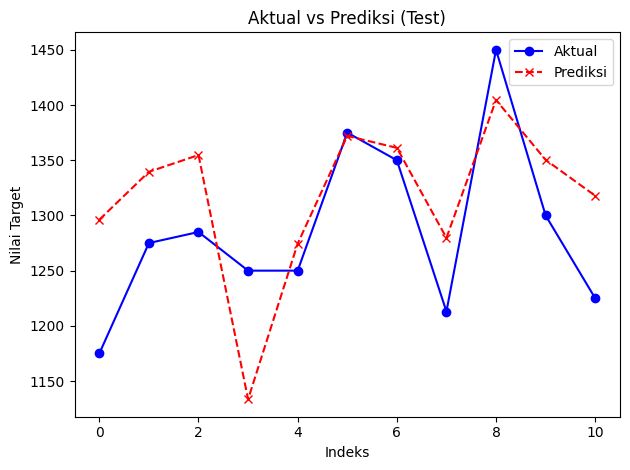

In [ ]:
# Plot untuk data testing
plt.plot(y_test, label='Aktual', color='blue', marker='o')
plt.plot(y_pred_test, label='Prediksi', color='red', linestyle='--', marker='x')
plt.title('Aktual vs Prediksi (Test)')
plt.xlabel('Indeks')
plt.ylabel('Nilai Target')
plt.legend()

plt.tight_layout()
plt.show()

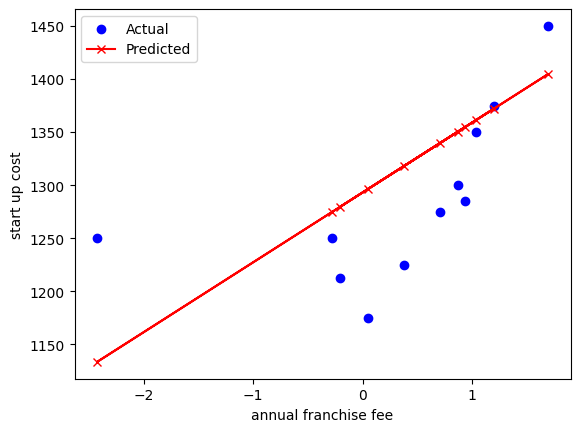

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_test, color='red', label='Predicted' ,marker='x')
plt.xlabel('annual franchise fee')
plt.ylabel('start up cost')
plt.legend()
plt.show()

## A.2 - Multiple Linear Regression

Untuk tutorial ini, kita akan menggunakan atribut film untuk memprediksi ratingnya. Berikut adalah informasi mengenai dataset:

| Kolom | Deskripsi |
| --- | --- |
| Avg_age_actors | Rata-rata usia aktor dalam film |
| Marketing_expense | Biaya pemasaran film (dalam USD) |
| Wardrobe_expense | Biaya produksi film (dalam USD) |
| Budget | Total anggaran untuk memproduksi film (dalam USD) |
| Lead_actor_rating | Rating dari aktor utama dalam film (skala: 0 - 10) |
| Lead_actress_rating | Rating dari aktris utama dalam film (skala: 0 - 10) |
| Director_rating | Rating dari sutradara film (skala: 0 - 10) |
| Producer_rating | Rating dari produser film (skala: 0 - 10) |
| Movie_length | Durasi film (dalam menit) |
| Trailer_views | Jumlah penonton yang menonton trailer di YouTube |
| Twitter_hastags | Jumlah tweet yang mengandung hashtag terkait film |
| Total_cinemas | Jumlah bioskop yang menayangkan film di seluruh dunia |
| Movie_rating | Rating yang diberikan kepada film oleh audiens (skala: 0 - 10) |

In [ ]:
# Data Loading

movie_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4AM%20-%20Linear%20Regression%20-%20Movie%20Ratings.csv')
movie_df

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas,Movie_rating
0,23,20126,59620,36524125,7.825,8.095,7.910,7.995,138.7,527367,22384,49400,7.94
1,42,20546,69140,35668655,7.505,7.650,7.440,7.470,152.4,494055,24346,46200,7.44
2,38,20546,69140,39912675,7.485,7.570,7.495,7.515,134.6,547051,202240,45800,7.44
3,45,20647,59360,38873890,6.895,7.035,6.920,7.020,119.3,516279,22534,47200,8.26
4,55,21381,59360,39701585,6.920,7.070,6.815,7.070,127.7,531448,22579,39500,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,27,21253,78860,36624115,8.680,8.775,8.620,8.970,142.6,492480,24358,56100,6.80
502,20,20905,78860,33996600,8.780,8.945,8.770,8.930,150.2,482875,26330,60000,7.80
503,31,21215,78860,38751680,8.830,8.970,8.855,9.010,164.5,532239,24382,57600,7.80
504,47,22192,78860,37740670,8.730,8.845,8.800,8.845,162.8,496077,30352,60700,6.80


In [ ]:
# Check Info Dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_age_actors       506 non-null    int64  
 1   Marketing_expense    506 non-null    int64  
 2   Wardrobe_expense     506 non-null    int64  
 3   Budget               506 non-null    int64  
 4   Lead_actor_rating    506 non-null    float64
 5   Lead_actrees_rating  506 non-null    float64
 6   Director_rating      506 non-null    float64
 7   Producer_rating      506 non-null    float64
 8   Movie_length         506 non-null    float64
 9   Trailer_views        506 non-null    int64  
 10  Twitter_hastags      506 non-null    int64  
 11  Total_cinemas        506 non-null    int64  
 12  Movie_rating         506 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 51.5 KB


In [ ]:
#statistika deskriptif
movie_df.describe()

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas,Movie_rating
count,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,39.181818,9.227046e+04,77273.557312,3.491114e+07,8.014002,8.185613,8.019664,8.190514,142.074901,449860.715415,26083.217391,54504.347826,7.810870
std,12.513697,1.720309e+05,13720.705882,3.903038e+06,1.054266,1.054290,1.059899,1.049601,28.148861,68917.763145,10477.905580,10633.288887,0.659699
min,3.000000,2.012600e+04,55920.000000,1.978136e+07,3.840000,4.035000,3.840000,4.030000,76.400000,212912.000000,20115.000000,33300.000000,6.600000
25%,28.000000,2.164100e+04,65380.000000,3.269395e+07,7.316250,7.503750,7.296250,7.507500,118.525000,409128.000000,22379.500000,46500.000000,7.200000
50%,39.000000,2.513000e+04,74380.000000,3.448822e+07,8.307500,8.495000,8.312500,8.465000,151.000000,462460.000000,25440.000000,53550.000000,7.960000
75%,50.000000,9.354125e+04,91200.000000,3.679354e+07,8.865000,9.030000,8.883750,9.030000,167.575000,500247.500000,28341.250000,61475.000000,8.260000
max,60.000000,1.799524e+06,110480.000000,4.877290e+07,9.435000,9.540000,9.425000,9.635000,173.500000,567784.000000,202240.000000,86800.000000,9.400000


In [ ]:
# Splitting antara `X` and `y`

X = movie_df.drop(['Movie_rating'], axis=1) #fitur
y = movie_df['Movie_rating'] #target

### A.2.1 - Cek Asumsi dalam Linear Regression

Dalam **regresi linear**, ada beberapa asumsi dasar yang harus dipenuhi agar model dapat memberikan hasil yang valid dan dapat diandalkan. Berikut adalah asumsi-asumsi utama dalam regresi linear:

1. **Linearitas (Linearity)**:
  - **Asumsi**: Hubungan antara variabel independen (\(X\)) dan variabel dependen (\(y\)) adalah linear.
  - **Penjelasan**: Model regresi linear mengasumsikan bahwa perubahan pada \(X\) akan menyebabkan perubahan yang proporsional pada \(y\). Jika hubungan antara \(X\) dan \(y\) tidak linear, model regresi linear tidak akan memberikan hasil yang baik.
  - **Cara Mengecek**: Visualisasikan hubungan antara \(X\) dan \(y\) menggunakan scatter plot untuk melihat apakah hubungan tersebut tampak linear.

2. **Tidak Ada Multikolinearitas atau hanya sedikit Multikolinearitas**:
  - **Asumsi**: Variabel independen tidak saling berkorelasi dengan sangat tinggi.
  - **Penjelasan**: Jika ada hubungan yang sangat kuat antara dua atau lebih variabel independen, ini bisa menyebabkan multikolinearitas, yang mengurangi kemampuan model untuk memperkirakan koefisien secara akurat.
  - **Cara Mengecek**: Hitung **Variance Inflation Factor (VIF)** untuk masing-masing fitur. Jika VIF tinggi (lebih dari 10), ada masalah multikolinearitas.

3. **Tidak Ada Pengaruh Pengamatan yang Berlebihan (No Outliers or Leverage Points)**:
  - **Asumsi**: Data tidak mengandung pengamatan yang berlebihan (outliers) atau titik leverage yang ekstrem yang bisa mempengaruhi hasil regresi secara tidak wajar.
  - **Penjelasan**: Titik data yang sangat jauh dari distribusi umum data dapat mempengaruhi hasil model secara tidak proporsional.
  - **Cara Mengecek**: Gunakan **leverage plots** dan **Cook's distance** untuk mendeteksi titik yang berpengaruh.

4. **Independensi Error (Independence of Errors)**:
  - **Asumsi**: Kesalahan (residuals) antara nilai yang diprediksi dan nilai sebenarnya tidak tergantung satu sama lain.
  - **Penjelasan**: Kesalahan (error terms) tidak boleh saling berhubungan. Misalnya, dalam data time series, kesalahan pada waktu \(t\) tidak boleh berhubungan dengan kesalahan pada waktu \(t-1\).
  - **Cara Mengecek**: Gunakan **Durbin-Watson test** untuk menguji autokorelasi dalam residuals.

5. **Homoscedasticity (Homoscedasticity)**
  - **Asumsi**: Varians kesalahan adalah konstan di seluruh rentang nilai \(X\).
  - **Penjelasan**: Asumsi ini mengharuskan bahwa sebaran residuals memiliki varians yang konsisten di seluruh nilai prediktor. Jika varians residuals berubah-ubah (heteroscedasticity), maka model regresi linear akan memberikan estimasi yang bias.
  - **Cara Mengecek**: Plot residuals terhadap nilai prediksi untuk melihat apakah terdapat pola dalam penyebaran kesalahan.

6. **Normalitas dari Error Terms (Normality of Error Terms)**
  - **Asumsi**: Kesalahan harus terdistribusi normal.
  - **Penjelasan**: Asumsi ini penting terutama untuk pengujian signifikansi parameter dan interval kepercayaan. Jika kesalahan tidak terdistribusi normal, hasil uji t dan F mungkin tidak valid.
  - **Cara Mengecek**: Gunakan **Q-Q plot** atau uji **Shapiro-Wilk** untuk memeriksa normalitas residuals.



Pada Contoh kali ini Kita hanya coba fokus terhadap Pengecekan `Linearitas, Multikolinearitas, Homoscedasticity dan Normalitas dari Error Terms`.

#### 1. Pengecekan Linearitas




Tujuan: Memastikan bahwa hubungan antara setiap variabel independen dan variabel dependen adalah linear.


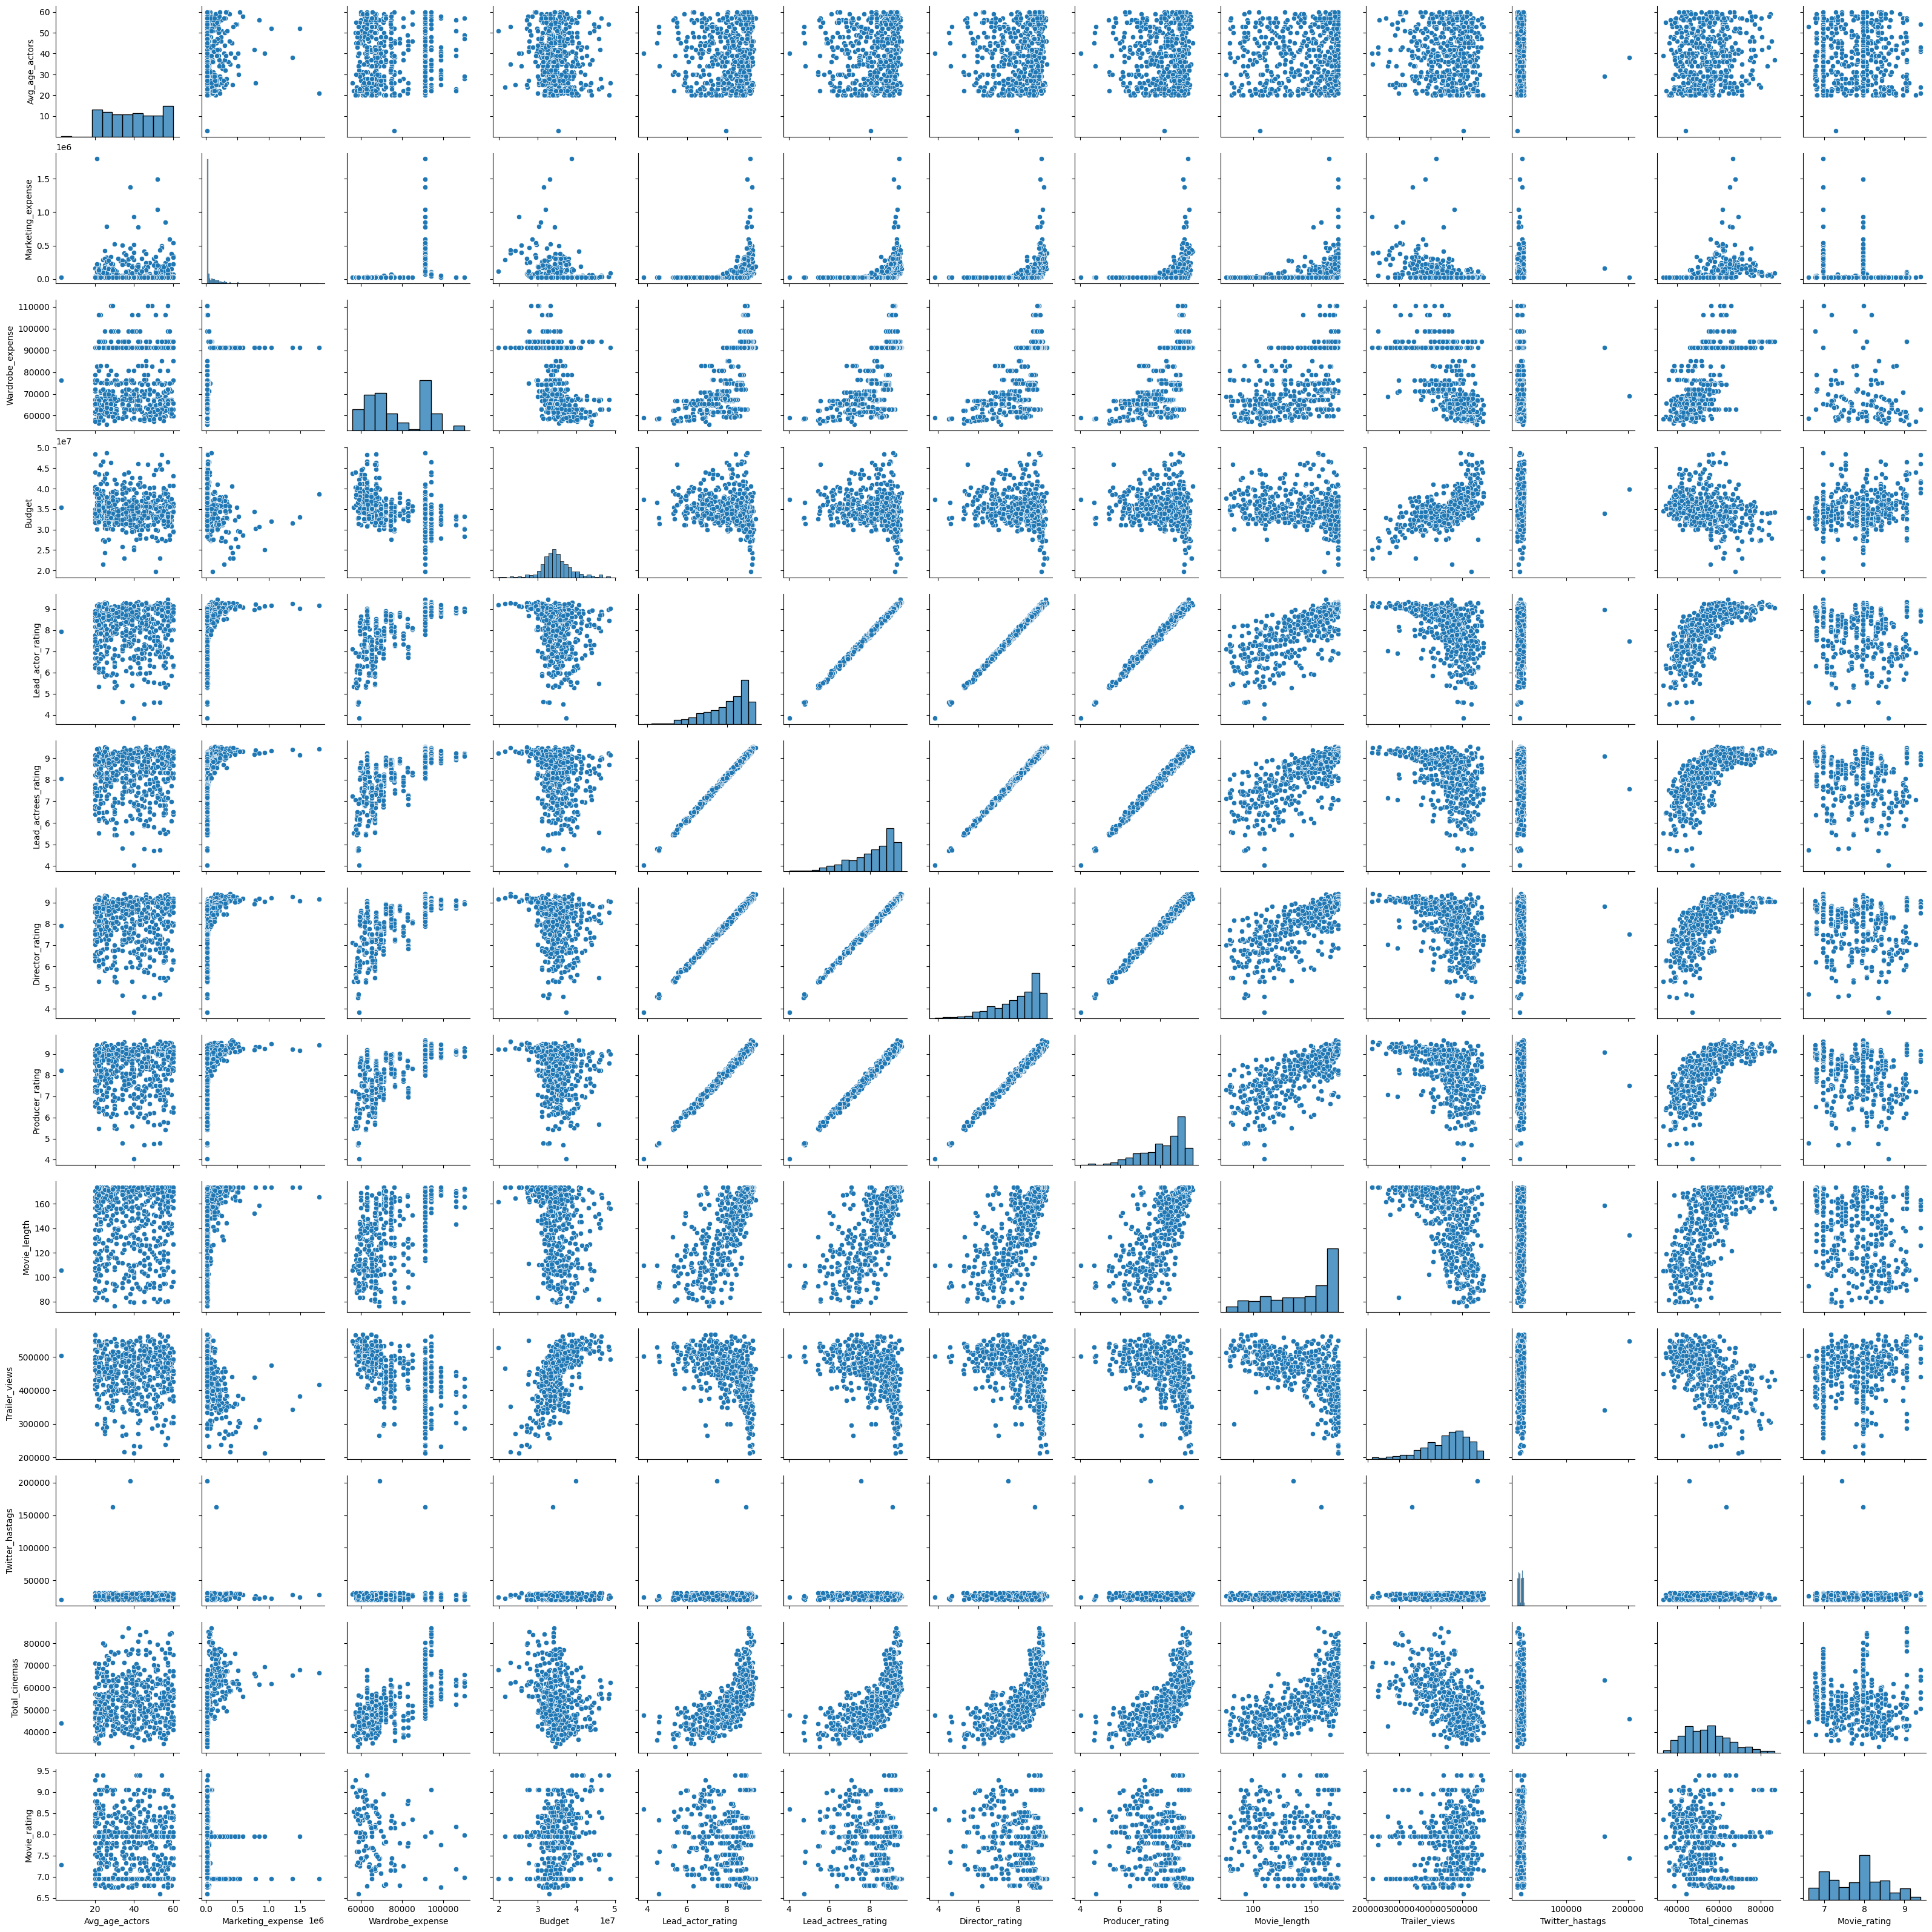

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat pairplot untuk melihat hubungan antar fitur dan target
sns.pairplot(movie_df)
plt.show()

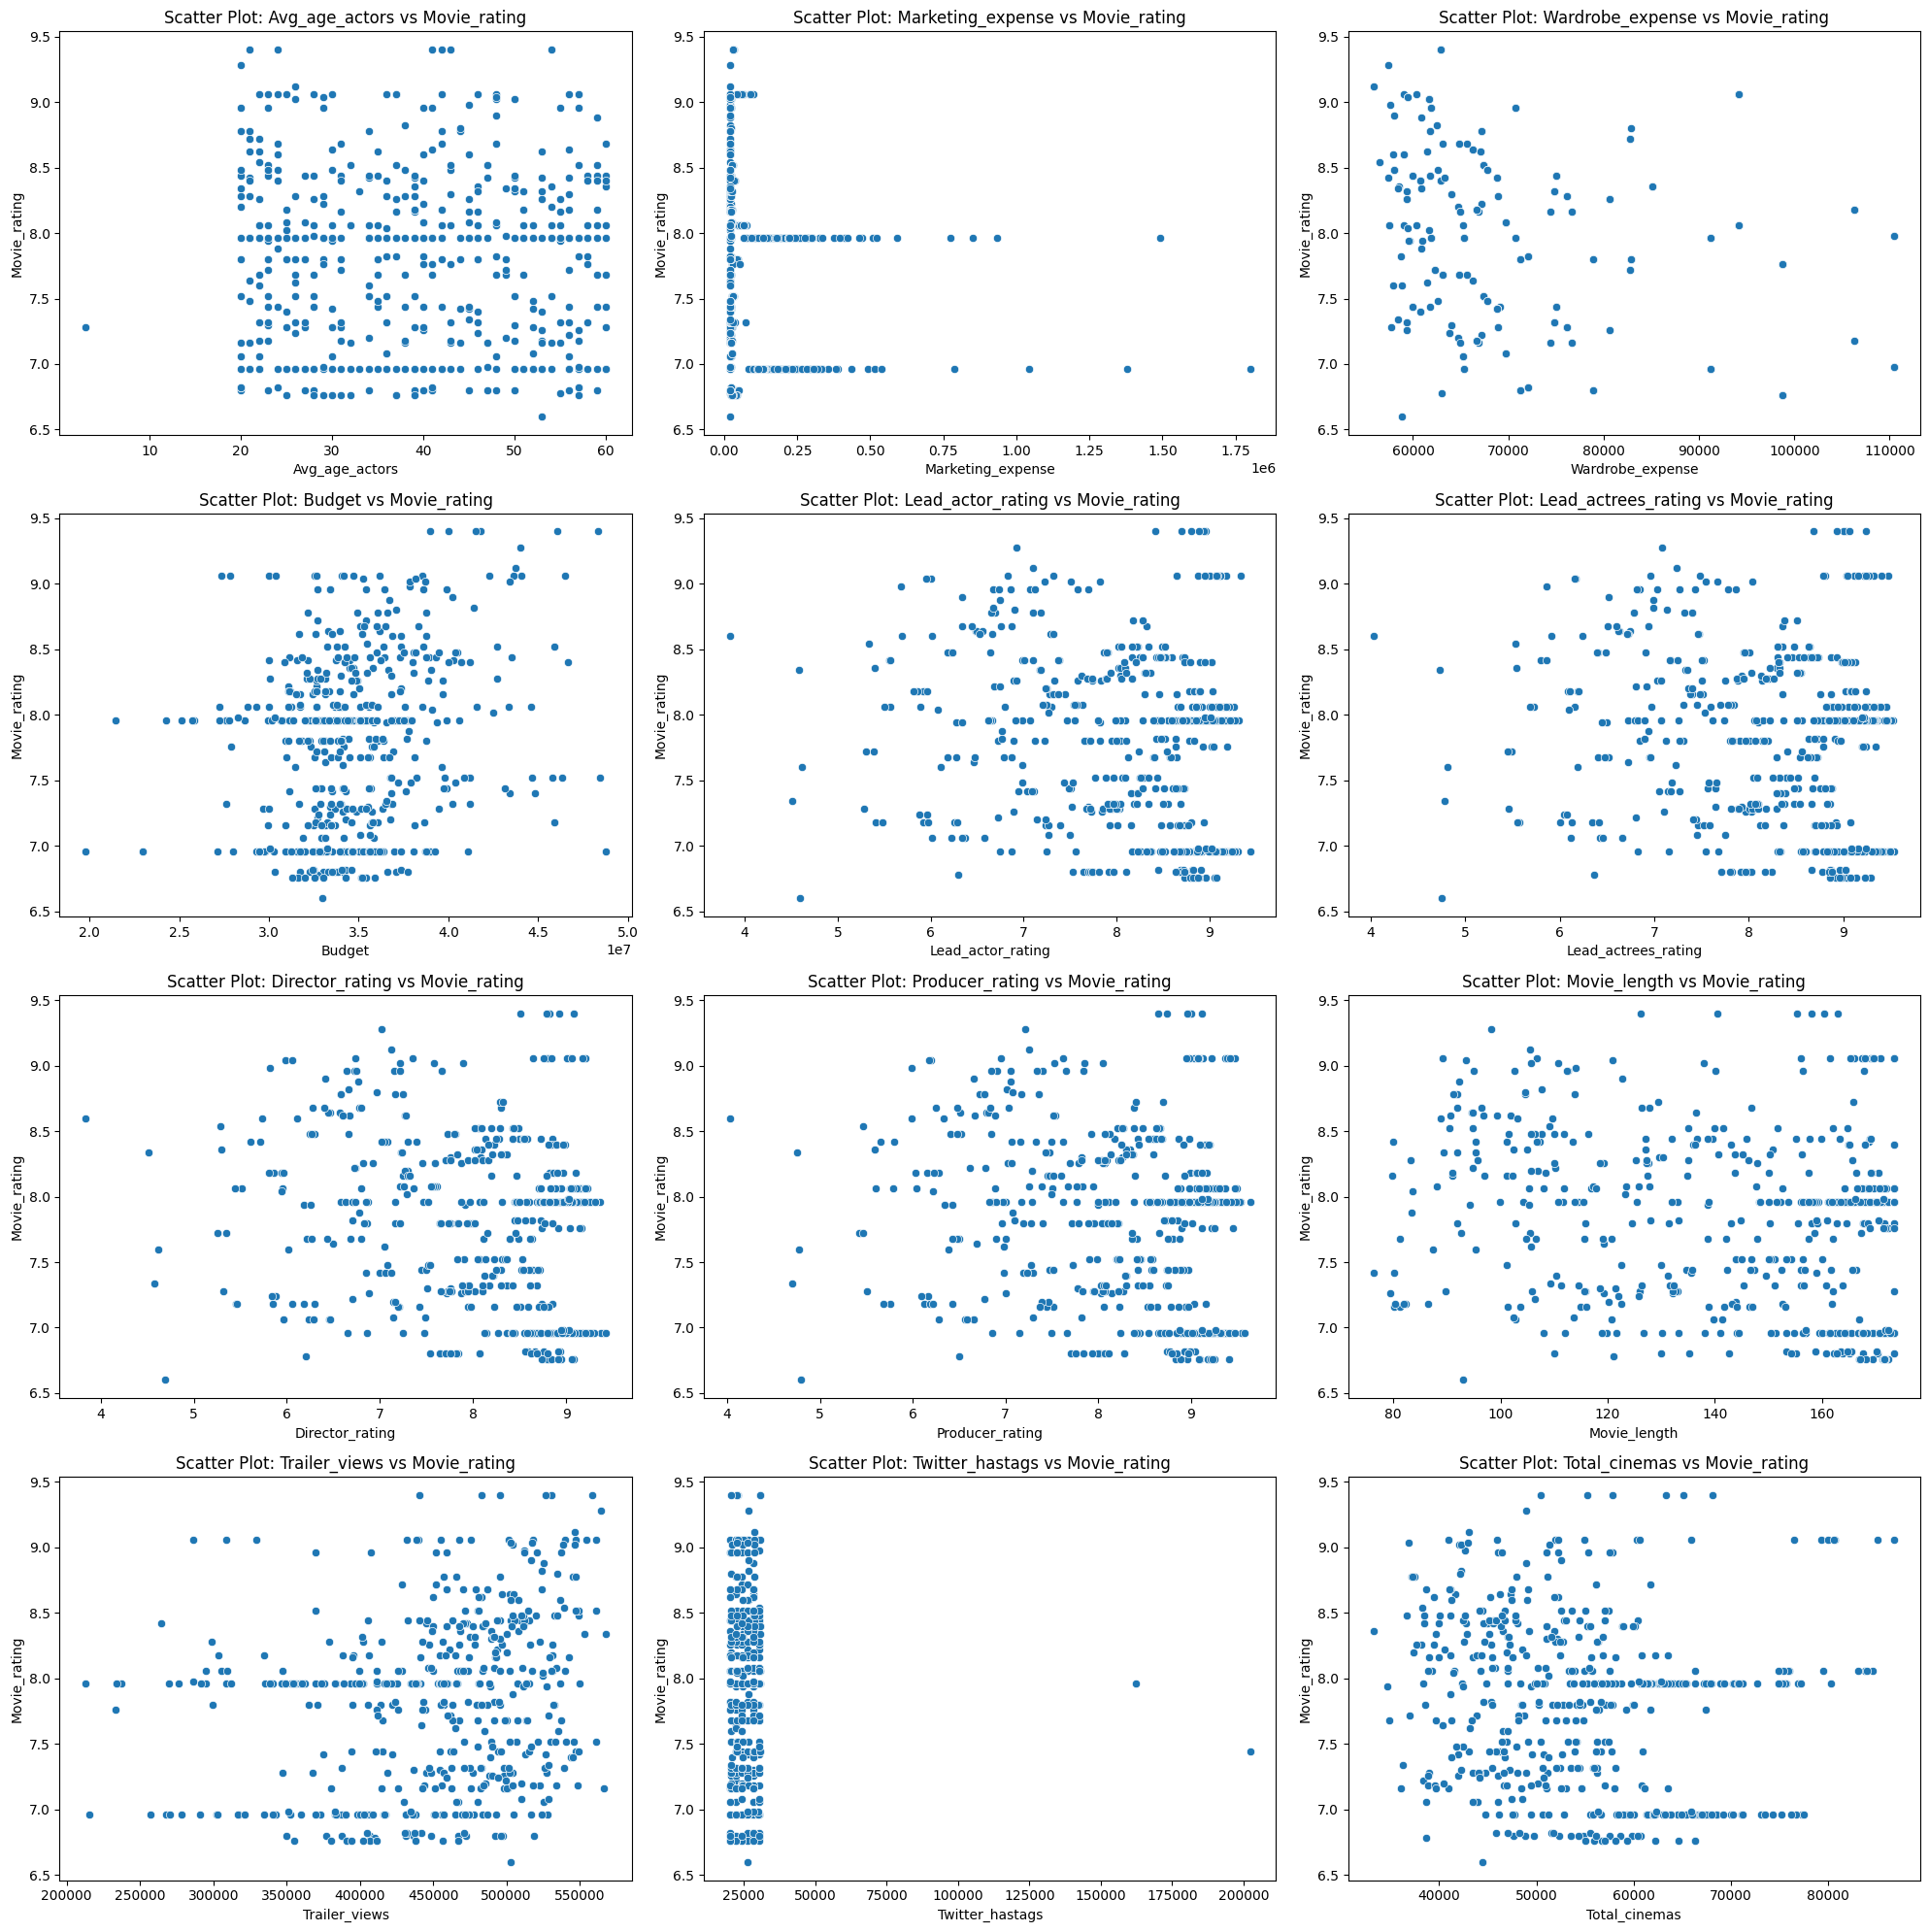

In [ ]:
# Menggunakan Looping untuk setiap fitur selain target

features = X.columns  # Semua fitur di DataFrame X
n_features = len(features)
n_cols = 3  # Jumlah kolom dalam grid

# Menghitung jumlah baris yang diperlukan berdasarkan jumlah fitur dan jumlah kolom
n_rows = np.ceil(n_features / n_cols).astype(int)

# Membuat figure dan grid subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten axes array untuk memudahkan indexing
axes = axes.flatten()

# Looping untuk setiap fitur selain target
for i, feature in enumerate(features):
    ax = axes[i]  # Mengambil axis yang sesuai dalam grid
    sns.scatterplot(x=movie_df[feature], y=y, ax=ax)
    ax.set_title(f'Scatter Plot: {feature} vs Movie_rating')
    ax.set_xlabel(feature)
    ax.set_ylabel('Movie_rating')

# Menyembunyikan axis yang tidak digunakan jika jumlah fitur lebih sedikit dari grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Insight:**

Dari Hasil grafik diatas kita mengetahui bahwa tidak ada hubungan linear antara fitur dan target

In [ ]:
# cek hubungan fitur dan target dengan korelasi
movie_df.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas,Movie_rating
Avg_age_actors,1.000000,0.059204,0.055810,-0.064694,0.036794,0.038005,0.041470,0.032542,0.075198,-0.049726,-0.004840,0.078811,-0.049797
Marketing_expense,0.059204,1.000000,0.406583,-0.219247,0.380050,0.379813,0.380069,0.376462,0.352734,-0.443457,0.013517,0.383298,-0.184985
Wardrobe_expense,0.055810,0.406583,1.000000,-0.391676,0.706481,0.707956,0.707566,0.705819,0.644779,-0.591657,-0.000837,0.707559,-0.251565
Budget,-0.064694,-0.219247,-0.391676,1.000000,-0.208464,-0.203981,-0.201907,-0.205397,-0.240265,0.602536,0.030673,-0.282796,0.232361
Lead_actor_rating,0.036794,0.380050,0.706481,-0.208464,1.000000,0.997905,0.997735,0.994073,0.746904,-0.490267,0.014463,0.706331,-0.169978
Lead_actrees_rating,0.038005,0.379813,0.707956,-0.203981,0.997905,1.000000,0.998097,0.994003,0.746493,-0.487536,0.010240,0.708257,-0.165992
Director_rating,0.041470,0.380069,0.707566,-0.201907,0.997735,0.998097,1.000000,0.994126,0.747021,-0.486452,0.010077,0.709364,-0.166638
Producer_rating,0.032542,0.376462,0.705819,-0.205397,0.994073,0.994003,0.994126,1.000000,0.746707,-0.487911,0.005850,0.703518,-0.167003
Movie_length,0.075198,0.352734,0.644779,-0.240265,0.746904,0.746493,0.747021,0.746707,1.000000,-0.589318,0.009381,0.673896,-0.217830
Trailer_views,-0.049726,-0.443457,-0.591657,0.602536,-0.490267,-0.487536,-0.486452,-0.487911,-0.589318,1.000000,-0.006704,-0.544100,0.228641


**Insight:**

Fitur dan target tidak memiliki korelasi yang cukup kuat, ini  juga menandakan bahwa sebagian besar hubungan fitur dan target tidak linear.


In [ ]:
# contoh, misalkan kita ambil fitur yang kolerasinya diatas 0.2
# Menghitung korelasi antara fitur dan target
correlation_matrix = movie_df.corr()
target_correlation = correlation_matrix["Movie_rating"]

# Mengambil korelasi absolut
absolute_correlation = target_correlation.abs()

# Ambil fitur yang memiliki korelasi absolut lebih dari 0.2 dengan target
selected_features = absolute_correlation[absolute_correlation > 0.2].index

#hapus target
selected_features = selected_features.drop('Movie_rating')

# Tampilkan fitur yang terpilih
print("Fitur yang memiliki korelasi absolut lebih dari 0.2 dengan target:")
print(selected_features)

Fitur yang memiliki korelasi absolut lebih dari 0.2 dengan target:
Index(['Wardrobe_expense', 'Budget', 'Movie_length', 'Trailer_views'], dtype='object')


#### 2.  Pengecekan Multikolinearitas


Tujuan: Memastikan tidak ada multikolinearitas di antara variabel independen.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Check Multicolinearity
calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
5,Lead_actrees_rating,21401.772450
6,Director_rating,19015.407592
4,Lead_actor_rating,18504.185640
7,Producer_rating,5887.895248
3,Budget,125.034332
9,Trailer_views,88.695611
2,Wardrobe_expense,83.484918
8,Movie_length,75.204209
11,Total_cinemas,71.515151
0,Avg_age_actors,10.627252


Berdasarkan tabel di atas, terdapat beberapa kolom yang memiliki nilai VIF lebih dari 10.

**Solusi:**
1. Anda dapat mencoba untuk mengurangi satu per satu kolom-kolom ini dan menghitung ulang nilai VIF. Langkah ini diulang hingga semua nilai VIF kurang dari 10.

2. Menggunakan pengetahuan domain untuk menghapus fitur. Misalnya, fitur `Wardrobe_expense` dapat dihapus karena fitur ini adalah bagian dari `Budget`.

3. PCA (Principal Component Analysis). Anda akan mempelajari teknik ini di minggu-minggu berikutnya.

In [ ]:
# Selanjutnya Splitting Dataset
# disini kita akan uji coba menggunakan semua fitur

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (354, 12)
Test size  :  (152, 12)


In [ ]:
# Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 1.17861079, -0.41425864, -1.29214218, ...,  0.68072601,
         0.97202136, -0.835354  ],
       [-1.21925254, -0.40200562, -0.16208345, ..., -0.28272223,
         0.32991585, -0.19070163],
       [-1.3791101 , -0.3972128 , -0.60948856, ...,  0.27090615,
        -0.89069039, -0.97755673],
       ...,
       [ 0.53918057, -0.41604692, -1.3166773 , ...,  0.81977072,
         0.34596848, -0.55094854],
       [ 0.61910935,  0.92611305,  1.00549958, ..., -1.65906848,
        -0.31370407,  2.09402224],
       [ 1.4983259 , -0.39030655, -0.37135358, ...,  0.07885852,
         0.31749777, -0.03901872]])

In [ ]:
# Training data menggunakan Linear Regression

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Check coefficients dan intercept

coefficients = model_linreg.coef_
intercept = model_linreg.intercept_

params = {
    'feature': X_train.columns.tolist(),
    'coefficient': model_linreg.coef_.tolist()
}

print('Intercept : ', intercept)

# Membuat DataFrame dari params
coef_df = pd.DataFrame(params)

# Mengurutkan berdasarkan nilai koefisien secara absolut
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

coef_df_sorted

Intercept :  7.841581920903953


,feature,coefficient,abs_coefficient
5,Lead_actrees_rating,0.582445,0.582445
4,Lead_actor_rating,-0.571373,0.571373
7,Producer_rating,0.164390,0.164390
2,Wardrobe_expense,-0.157079,0.157079
6,Director_rating,-0.121406,0.121406
11,Total_cinemas,0.116034,0.116034
1,Marketing_expense,-0.100301,0.100301
8,Movie_length,-0.095377,0.095377
3,Budget,0.079534,0.079534
10,Twitter_hastags,-0.025957,0.025957


Keterangan:
- Intercept memberi tahu kita nilai prediksi awal untuk target ketika tidak ada variabel independen yang berkontribusi.
-  Setiap koefisien berhubungan dengan fitur yang ada. Koefisien tersebut menunjukkan pengaruh fitur terhadap target. Misalnya, jika koefisiennya positif, artinya ketika fitur tersebut meningkat, nilai prediksi target juga cenderung meningkat, dan sebaliknya jika koefisiennya negatif.

-  Koefisien yang lebih besar dalam nilai absolutnya biasanya lebih signifikan, artinya fitur tersebut memiliki dampak yang lebih besar terhadap model dibandingkan dengan fitur lain yang memiliki koefisien lebih kecil. Oleh karena itu, Anda dapat memilih fitur yang memiliki koefisien absolut terbesar sebagai fitur yang paling berpengaruh.

- Fitur dengan koefisien mendekati nol: Fitur yang hampir tidak berpengaruh terhadap target.


In [ ]:
# Predict Train-Set & Test-Set

y_pred_train = model_linreg.predict(X_train_scaled)
y_pred_test = model_linreg.predict(X_test_scaled)

In [ ]:
# Model evaluation dengan metrics yang berbeda

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('')

print('MAPE - Train Set : ', mean_absolute_percentage_error(y_train, y_pred_train))
print('MAPE - Test Set  : ', mean_absolute_percentage_error(y_test, y_pred_test))
print('')


print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print('')

MAE - Train Set  :  0.5290075535029705
MAE - Test Set   :  0.5651855196239395

MSE - Train Set  :  0.38258434851194584
MSE - Test Set   :  0.4153908232647277

RMSE - Train Set :  0.6185340318138897
RMSE - Test Set  :  0.6445082026357211

MAPE - Train Set :  0.06824355032971159
MAPE - Test Set  :  0.07427653295282628

R2 Score - Train Set :  0.11144059289220754
R2 Score - Test Set  :  0.046882372740278844



Dari hasil diatas menurut anda apakah modelnya Overfitting, underfitting atau good fit?

**Catatan**:
- Nilai R-squared yang rendah tidak selalu berarti model yang buruk: Model yang sederhana dengan sedikit prediktor mungkin memiliki R-squared yang rendah, tetapi masih dapat memberikan prediksi yang akurat.

- R-squared sebesar 0.11 (training set) dan 0.05 (test set) menunjukkan bahwa model kita hanya dapat menjelaskan sebagian kecil dari variasi dalam rating film. Ini berarti ada banyak faktor lain yang mempengaruhi rating film selain fitur-fitur yang kita gunakan dalam model.


#### 3. Pengecekan Homoscedasticity (Plot Residuals)

Tujuan: Memastikan varians residual konstan di seluruh rentang nilai prediksi.

Untuk memeriksa homoskedastisitas (homoscedasticity) dalam model regresi linier, kita perlu memastikan bahwa varians residual (perbedaan antara nilai yang diprediksi dan nilai aktual) konstan di seluruh rentang nilai prediktor. Jika varians residual tidak konstan (misalnya, semakin besar prediksi semakin besar varians), itu disebut heteroskedastisitas.

<img src='https://pbs.twimg.com/media/EyIQ37NVoAEkXLE.jpg'>

In [ ]:
# Menghitung residual untuk data train dan test
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

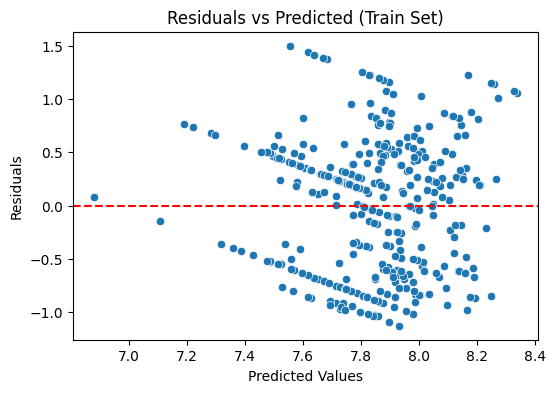

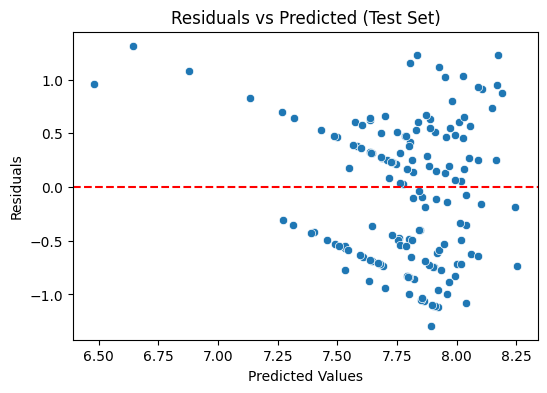

In [ ]:
# Membuat plot residual untuk Train Set
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_train, y=residual_train)
plt.axhline(0, color='r', linestyle='--')  # Garis horizontal di 0
plt.title('Residuals vs Predicted (Train Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Membuat plot residual untuk Test Set
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_test, y=residual_test)
plt.axhline(0, color='r', linestyle='--')  # Garis horizontal di 0
plt.title('Residuals vs Predicted (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Interpretasi Grafik:**

Dari grafik tersebut tampaknya data yang kita gunakan menunjukkan **heteroskedastisitas**. Ini karena sebaran titik-titik tidak konsisten di sekitar garis horizontal nol. Terdapat kecenderungan sebaran titik-titik semakin melebar saat nilai prediksi meningkat.

#### 3. Normalitas Normalitas dari Error Terms

Tujuan: Memastikan residual terdistribusi normal.

Cara Memeriksa Normalitas Residual:
- Plot Histogram dari Residual: Memeriksa bentuk distribusi residual.
- Q-Q Plot (Quantile-Quantile Plot): Memvisualisasikan apakah residual mengikuti distribusi normal.

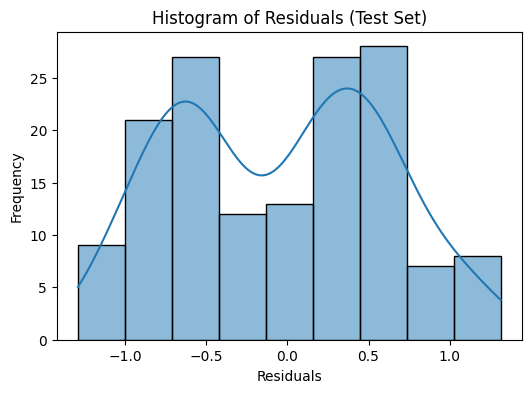

In [ ]:
# Plot histogram untuk residual test
plt.figure(figsize=(6, 4))
sns.histplot(residual_test, kde=True)  # Histogram dengan Kernel Density Estimation
plt.title('Histogram of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Jika histogram memiliki bentuk lonceng (seperti distribusi normal), itu mengindikasikan residual yang mungkin mengikuti distribusi normal.

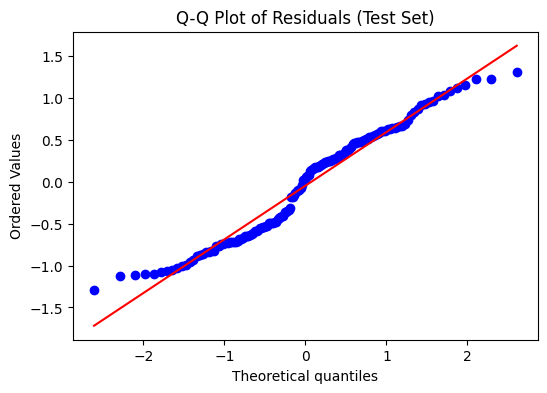

In [ ]:
import scipy.stats as stats

# Q-Q plot untuk residual test set
plt.figure(figsize=(6, 4))
stats.probplot(residual_test.values, dist="norm", plot=plt)  # Menggunakan .values untuk mengakses array
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

Jika titik-titik pada plot Q-Q terletak di sepanjang garis lurus, ini mengindikasikan bahwa residual mengikuti distribusi normal atau mendekati distribusi normal.


## A.3 - Transformasi Fitur dengan PolynomialFeatures

Untuk menerapkan Polynomial pada data atau model kita kita bisa gunakan `PolynomialFeatures`.

In [ ]:
movie_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4AM%20-%20Linear%20Regression%20-%20Movie%20Ratings.csv')

# Splitting antara `X` and `y`

X = movie_df.drop(['Movie_rating'], axis=1) #fitur
y = movie_df['Movie_rating'] #target

# Memisahkan dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (354, 12)
Test size  :  (152, 12)


Saat ingin menggunakan regresi polinomial, terutama dengan derajat polinomial lebih tinggi, scaling sangat penting untuk memastikan bahwa fitur dengan skala yang lebih besar tidak mendominasi model, serta membantu konvergensi yang lebih stabil dan cepat.

In [ ]:
# 1. Scaling fitur menggunakan StandardScaler
scaler = StandardScaler()

# Fitting scaler pada data latih dan mentransformasi data latih dan uji
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 2. Transformasi data menjadi fitur polinomial derajat 2
poly = PolynomialFeatures(degree=2)

# Transformasi data latih dan uji
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Fitur setelah transformasi polinomial: ", X_train_poly.shape)


Fitur setelah transformasi polinomial:  (354, 91)


In [ ]:
# 3. Membuat dan melatih model regresi linier
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# 4. Prediksi pada data latih dan uji
y_pred_train_poly = model_poly.predict(X_train_poly)
y_pred_test_poly = model_poly.predict(X_test_poly)

In [ ]:
# 5. Menghitung RMSE (Root Mean Squared Error)
rmse_train_poly = mean_squared_error(y_train, y_pred_train_poly, squared=False)
rmse_test_poly = mean_squared_error(y_test, y_pred_test_poly, squared=False)

# 6. Menghitung R² (Koefisien Determinasi)
r2_train_poly = r2_score(y_train, y_pred_train_poly)
r2_test_poly = r2_score(y_test, y_pred_test_poly)

In [ ]:
print('RMSE - Train Set (Polynomial): ', rmse_train_poly)
print('RMSE - Test Set (Polynomial): ', rmse_test_poly)
print('R2 - Train Set (Polynomial): ', r2_train_poly)
print('R2 - Test Set (Polynomial): ', r2_test_poly)

RMSE - Train Set (Polynomial):  0.5117672198500234
RMSE - Test Set (Polynomial):  1.0299048274560216
R2 - Train Set (Polynomial):  0.3917190728210057
R2 - Test Set (Polynomial):  -1.4337938608055265


Hasil evaluasi yang didapat dengan polynomial ternyata lebih buruk dibandingkan Linear Regression yang sebelumnya telah kita buat.

In [ ]:
# Menghitung residual untuk data train dan test
residual_train = y_train - y_pred_train_poly
residual_test = y_test - y_pred_test_poly

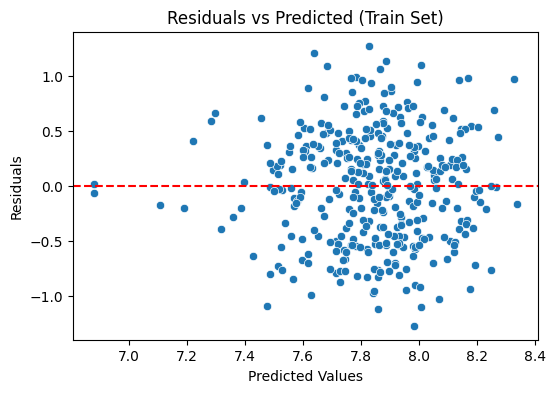

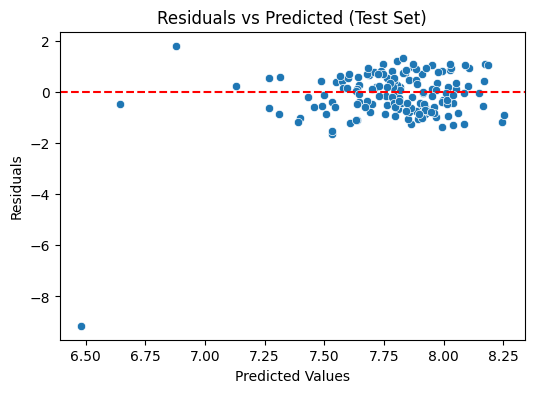

In [ ]:
# Membuat plot residual untuk Train Set
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_train, y=residual_train)
plt.axhline(0, color='r', linestyle='--')  # Garis horizontal di 0
plt.title('Residuals vs Predicted (Train Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Membuat plot residual untuk Test Set
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_test, y=residual_test)
plt.axhline(0, color='r', linestyle='--')  # Garis horizontal di 0
plt.title('Residuals vs Predicted (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

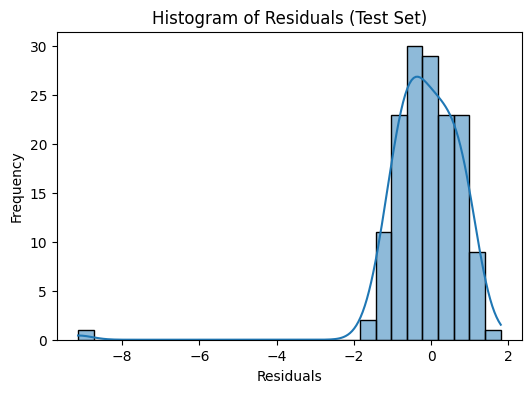

In [ ]:
# Plot histogram untuk residual test
plt.figure(figsize=(6, 4))
sns.histplot(residual_test, kde=True)  # Histogram dengan Kernel Density Estimation
plt.title('Histogram of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
